In [5]:
#Prevent unnecessary warnings.
import warnings
warnings.filterwarnings("ignore")

#Introduce the basic package of data science.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
##Set attributes to prevent garbled characters in Chinese.
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

#Introduce machine learning, preprocessing, model selection, and evaluation indicators.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

#Import the Boston dataset used this time.
from sklearn.datasets import load_boston

#Introduce algorithms.
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
#Compared with SVC, it is the regression form of SVM.
from sklearn.svm import SVR
#Integrate algorithms.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


In [6]:
#Load the Boston house price data set.
boston = load_boston()

#x features, and y labels.
x = boston.data
y = boston.target

#Display related attributes.
print('Feature column name')
print(boston.feature_names)
print("Sample data volume: %d, number of features: %d"% x.shape)
print("Target sample data volume: %d"% y.shape[0])


Feature column name
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Sample data volume: 506, number of features: 13
Target sample data volume: 506


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


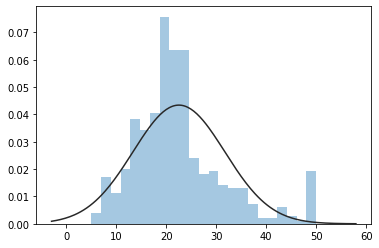

In [17]:
x = pd.DataFrame(boston.data, columns=boston.feature_names)

sns.distplot(tuple(y), kde=False, fit=st.norm)
x

In [16]:
#Segment the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)
#Standardize the data set.
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
x_train[0:100]


array([[-0.35703125, -0.49503678, -0.15692398, ..., -0.01188637,
         0.42050162, -0.29153411],
       [-0.39135992, -0.49503678, -0.02431196, ...,  0.35398749,
         0.37314392, -0.97290358],
       [ 0.5001037 , -0.49503678,  1.03804143, ...,  0.81132983,
         0.4391143 ,  1.18523567],
       ...,
       [-0.34697089, -0.49503678, -0.15692398, ..., -0.01188637,
         0.4391143 , -1.11086682],
       [-0.39762221,  2.80452783, -0.87827504, ...,  0.35398749,
         0.4391143 , -1.28120919],
       [-0.38331362,  0.41234349, -0.74566303, ...,  0.30825326,
         0.19472652, -0.40978832]])

In [18]:
#Set the model name.
names = ['LinerRegression',
       'Ridge',
       'Lasso',
       'Random Forrest',
       'GBDT',
       'Support Vector Regression',
       'ElasticNet',
       'XgBoost']


#Define the model.
# cv is the cross-validation idea here.
models = [LinearRegression(),
         RidgeCV(alphas=(0.001,0.1,1),cv=3),
         LassoCV(alphas=(0.001,0.1,1),cv=5),
         RandomForestRegressor(n_estimators=10),
         GradientBoostingRegressor(n_estimators=30),
         SVR(),
         ElasticNet(alpha=0.001,max_iter=10000),
         XGBRegressor()]
# Output the R2 scores of all regression models.

#Define the R2 scoring function.
def R2(model,x_train, x_test, y_train, y_test):

        model_fitted = model.fit(x_train,y_train)
        y_pred = model_fitted.predict(x_test)
        score = r2_score(y_test, y_pred)
        return score

#Traverse all models to score.
for name,model in zip(names,models):
        score = R2(model,x_train, x_test, y_train, y_test)
        print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))


LinerRegression: 0.564115, 0.0000
Ridge: 0.563673, 0.0000
Lasso: 0.564049, 0.0000
Random Forrest: 0.686354, 0.0000
GBDT: 0.732199, 0.0000
Support Vector Regression: 0.517260, 0.0000
ElasticNet: 0.563992, 0.0000
[13:37:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XgBoost: 0.761123, 0.0000
